In [3]:
import nest
import nest.voltage_trace
import matplotlib.pyplot as plt

nest.set_verbosity("M_WARNING")
nest.ResetKernel()

In [4]:
neuron = nest.Create("iaf_psc_alpha")
voltmeter = nest.Create("voltmeter")

In [5]:
neuron.I_e = 376.0

In [6]:
nest.Connect(voltmeter, neuron)

In [7]:
nest.Simulate(1000.0)

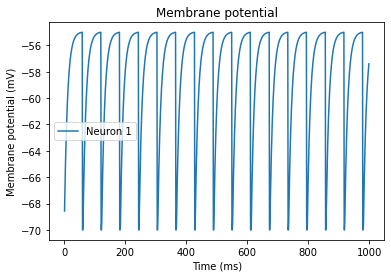

In [10]:
nest.voltage_trace.from_device(voltmeter)
plt.show()

Ejemplo de Hodgkin-Huxley

Simulating with current I=0 pA
Simulating with current I=20 pA
Simulating with current I=40 pA
Simulating with current I=60 pA
Simulating with current I=80 pA
Simulating with current I=100 pA
Simulating with current I=120 pA
Simulating with current I=140 pA
Simulating with current I=160 pA
Simulating with current I=180 pA
Simulating with current I=200 pA
Simulating with current I=220 pA
Simulating with current I=240 pA
Simulating with current I=260 pA
Simulating with current I=280 pA
Simulating with current I=300 pA
Simulating with current I=320 pA
Simulating with current I=340 pA
Simulating with current I=360 pA
Simulating with current I=380 pA
Simulating with current I=400 pA
Simulating with current I=420 pA
Simulating with current I=440 pA
Simulating with current I=460 pA
Simulating with current I=480 pA
Simulating with current I=500 pA
Simulating with current I=520 pA
Simulating with current I=540 pA
Simulating with current I=560 pA
Simulating with current I=580 pA
Simulating with 

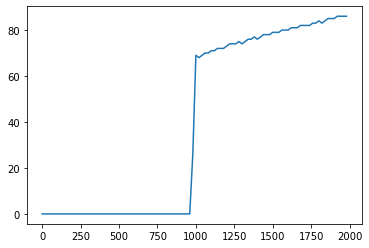

In [12]:
# -*- coding: utf-8 -*-
#
# hh_psc_alpha.py
#
# This file is part of NEST.
#
# Copyright (C) 2004 The NEST Initiative
#
# NEST is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 2 of the License, or
# (at your option) any later version.
#
# NEST is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with NEST.  If not, see <http://www.gnu.org/licenses/>.

"""
Example using Hodgkin-Huxley neuron
-----------------------------------

This example produces a rate-response (FI) curve of the Hodgkin-Huxley
neuron ``hh_psc_alpha`` in response to a range of different current (DC) stimulations.
The result is plotted using matplotlib.

Since a DC input affects only the neuron's channel dynamics, this routine
does not yet check correctness of synaptic response.
"""

import nest
import numpy as np
import matplotlib.pyplot as plt

nest.set_verbosity('M_WARNING')
nest.ResetKernel()

simtime = 1000

# Amplitude range, in pA
dcfrom = 0
dcstep = 20
dcto = 2000

h = 0.1  # simulation step size in mS

neuron = nest.Create('hh_psc_alpha')
sr = nest.Create('spike_recorder')

sr.record_to = 'memory'

nest.Connect(neuron, sr, syn_spec={'weight': 1.0, 'delay': h})

# Simulation loop
n_data = int(dcto / float(dcstep))
amplitudes = np.zeros(n_data)
event_freqs = np.zeros(n_data)
for i, amp in enumerate(range(dcfrom, dcto, dcstep)):
    neuron.I_e = float(amp)
    print(f"Simulating with current I={amp} pA")
    nest.Simulate(1000)  # one second warm-up time for equilibrium state
    sr.n_events = 0  # then reset spike counts
    nest.Simulate(simtime)  # another simulation call to record firing rate

    n_events = sr.n_events
    amplitudes[i] = amp
    event_freqs[i] = n_events / (simtime / 1000.)

plt.plot(amplitudes, event_freqs)
plt.show()
